In [2]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import cv2 
import math

In [3]:
audio_data = '84-121123-0000.wav'

x , sr = librosa.load(audio_data,sr=44100)
#print(type(x), type(sr) , "sampling rate: ", sr )#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '84-121123-0000.wav'

In [4]:
librosa.load(audio_data, sr=44100)

FileNotFoundError: [Errno 2] No such file or directory: '84-121123-0000.wav'

In [38]:
#Load Audio player widget
ipd.Audio(audio_data)

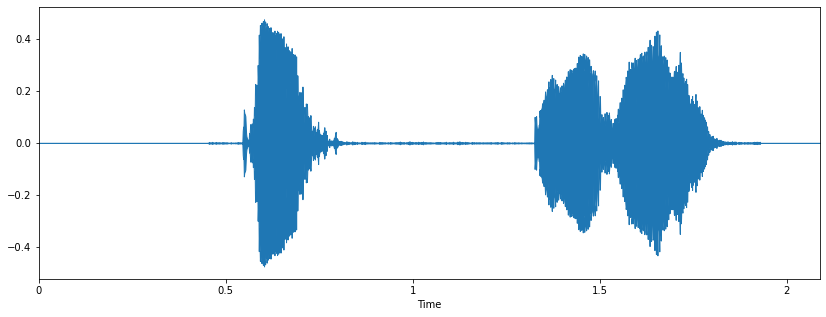

In [39]:
%matplotlib inline

#prepare a plotting area with decent size
plt.figure(figsize=(14, 5))
#loads the wave plot
librosa.display.waveplot(x, sr=sr)

[[3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]
 [3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]
 [3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]
 ...
 [3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]
 [3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]
 [3.5047157 3.5047157 3.5047157 ... 3.5047157 3.5047157 3.5047157]]


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


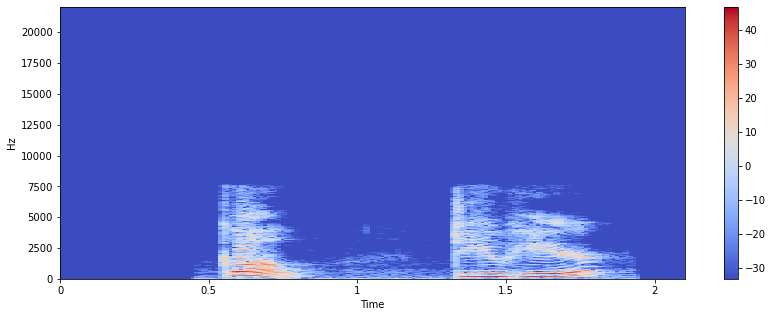

In [40]:
#short term Fourier transform
X = librosa.stft(x)
#Convert an amplitude spectrogram to dB-scaled spectrogram.
Xdb = librosa.amplitude_to_db(abs(X))
#prepare a plotting area with decent size
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(np.log(Xdb*-1))

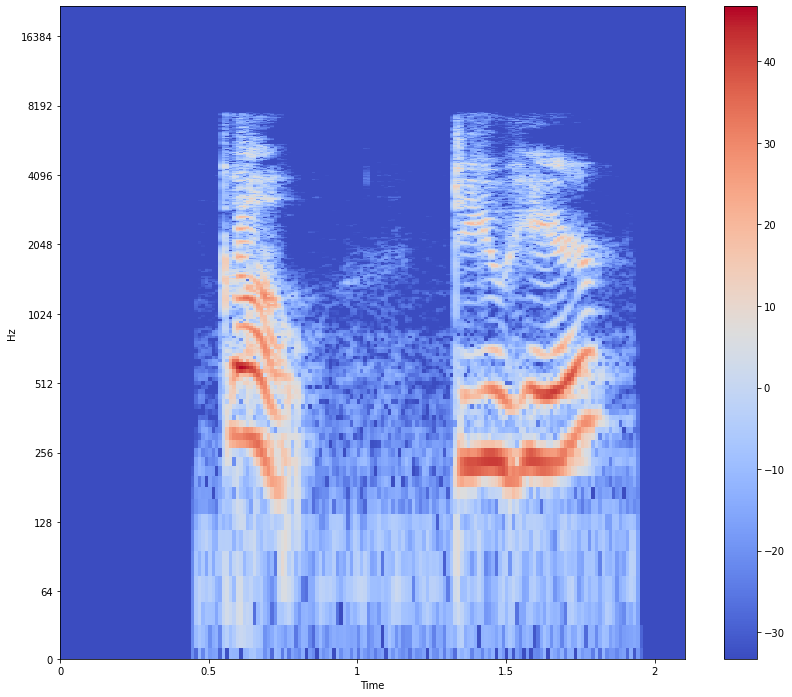

In [41]:
plt.figure(figsize=(14, 12))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [9]:
print(Xdb)

[[-52.22293  -52.22293  -52.22293  ... -52.22293  -52.22293  -52.22293 ]
 [-52.22293  -52.22293  -52.22293  ... -52.22293  -52.22293  -52.22293 ]
 [-52.22293  -52.22293  -52.22293  ... -52.22293  -52.22293  -52.22293 ]
 ...
 [-52.22293  -52.22293  -52.22293  ... -52.22293  -52.22293  -52.22293 ]
 [-52.22293  -52.22293  -51.21792  ... -52.22293  -52.22293  -52.22293 ]
 [-51.736492 -50.534103 -52.22293  ... -50.51335  -50.36904  -50.343025]]


[[-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]
 [-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]
 [-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]
 ...
 [-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]
 [-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]
 [-33.27198 -33.27198 -33.27198 ... -33.27198 -33.27198 -33.27198]]


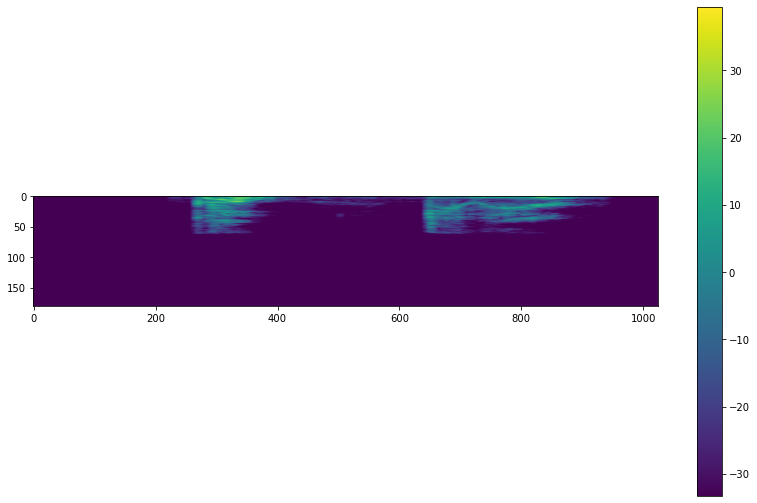

In [42]:

test = cv2.resize(Xdb, Xdb.shape)
#test = cv2.flip(test,0)

print(test)
plt.figure(figsize=(14, 9))
plt.imshow(test)
plt.colorbar()

In [23]:
print(cv2.__version__)
testCopy = np.uint8(test)
edges = cv2.Canny(testCopy,1,1000)

4.3.0


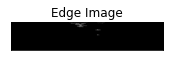

In [25]:
plt.subplot(121),plt.imshow(test,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [43]:
import numpy as np
#sr = 22050 # sample rate
#T = 5.0    # seconds
#t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#x = 0.5*np.sin(2*np.pi*89*t)# pure sine wave at 220 Hz
#Playing the audio
#ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
#librosa.output.write_wav('tone_220.wav', x, sr)

In [44]:
ipd.Audio(x,rate=sr)

In [45]:
print(np.shape(x))
print (x.mean())

(92169,)
-1.6816801e-06


In [46]:
# Spectral Centroid

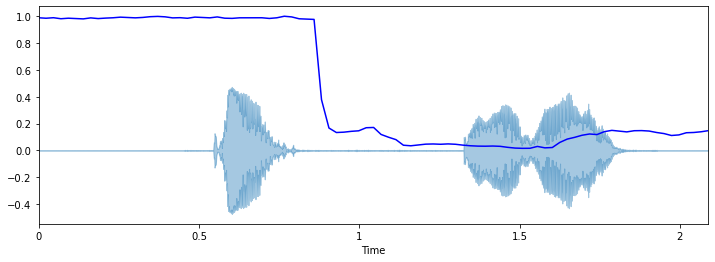

In [47]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [48]:
# Spectral Rolloff

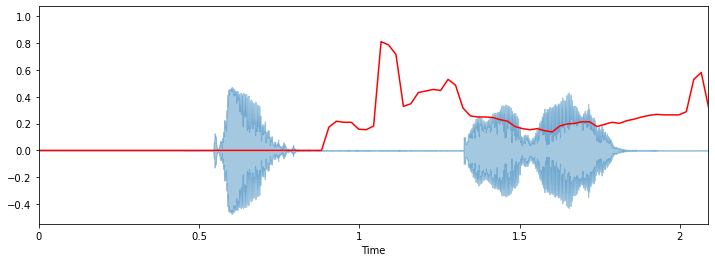

In [49]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [50]:
#Spectral Bandwidth

In [5]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, hop_length=220)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
spectral_bandwidth_5 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=5)[0]
spectral_bandwidth_6 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=6)[0]
plt.figure(figsize=(15, 12))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.plot(t, normalize(spectral_bandwidth_5), color='b')
plt.plot(t, normalize(spectral_bandwidth_6), color='pink')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

NameError: name 'x' is not defined

In [52]:
# Zero Crossing Rate

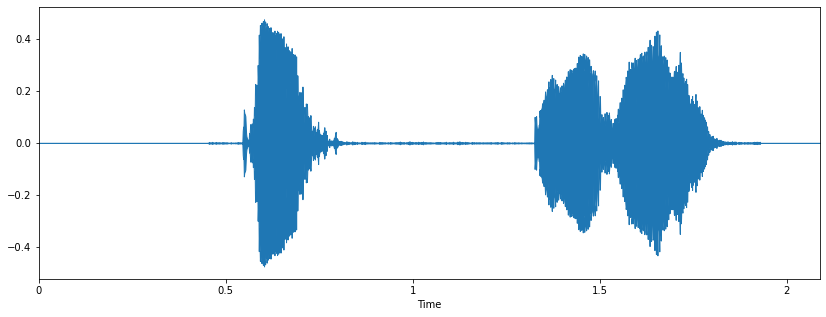

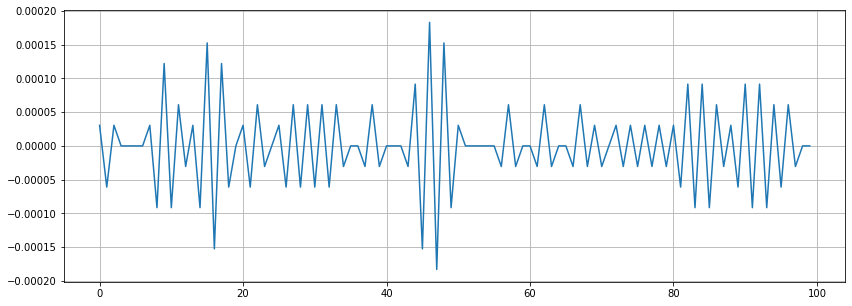

In [53]:

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [54]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

80


In [59]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
#librosa.display.specshow(mfccs, sr=sr, x_axis='time')

(20, 181)


<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

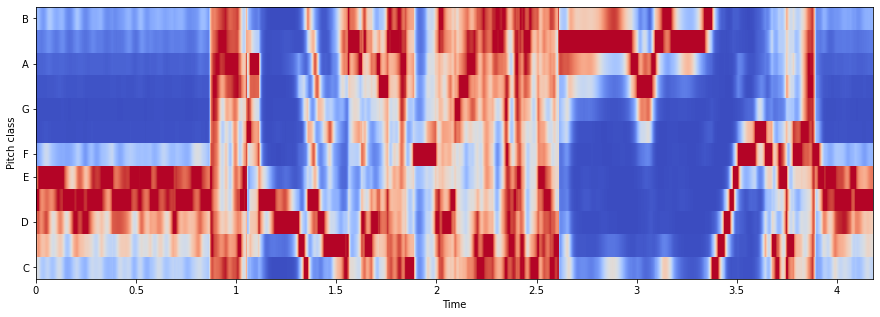

In [58]:
hop_length = 4
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


In [57]:
print(mfccs)

[[-557.71295 -557.71295 -557.71295 ... -557.71295 -557.71295 -557.71295]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]]
